# A Plotting Project in Python using Matplotlib

**by Bernardo Di Chiara**

_October 17th 2018_

## Overview

This project uses real world weather data.

The data is manipulated to display the minimum and maximum temperatures for a range of dates by using a composite line graph created with matplotlib. Line plots show the record high and record low daily temperatures in a certain area over a period of ten years. Scatter plots of record-breaking data for a given year are overlaid.

The data comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. The data used here is related to Helsinki Greater Area (Finland).

There are 105583 entries and each entry corresponds to a single observation.

For each observation, the value of the following variables is provided:

* ID : the station identification code
* Date : date in YYYY-MM-DD format
* Element : an indicator of element type
    * TMAX : maximum temperature
    * TMIN : minimum temperature
* Data_Value : data value for the element (in tenths of degrees Celsius)

## The Original Data

In [145]:
### Importing the needed libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

### Importing the csv data as a dataframe

filename = 'data/C2A2_data/BinnedCsvs_d400/df1ab5db827ddd1a4e272de7c3b698db8cd67038bdd3c72c2a351f09.csv'
dcr = pd.read_csv(filename)

### Cleansing and preparing the data

## Modifying the original dataframe
# Changing the column types
dcr['Date'] = pd.to_datetime(dcr['Date']) # Changing the dates into Pandas datetime format
dcr['Data_Value'] = pd.to_numeric(dcr['Data_Value']) # Changing the values into numeric format
dcr.head()

,ID,Date,Element,Data_Value
0,FIE00142080,2010-11-22,TMAX,-42
1,FIE00142106,2012-05-15,TMAX,160
2,FIE00142751,2007-01-15,TMAX,11
3,FIE00142331,2014-02-11,TMIN,-2
4,FI000000304,2007-03-03,TMIN,2


## The Manipulated Data

In [146]:
## Creating new dataframes with relevant years
# Extracting data related to years 2005 - 2014 and storing it into a new dataframe
dcr_2005_2014 = dcr[dcr['Date'] < '2015-01-01' ]
# Eliminating the year from the date
dcr_2005_2014['Date'] = dcr_2005_2014['Date'].apply(lambda x: x.strftime('%m-%d'))
# Extracting data related to year 2015
dcr_2015 = dcr[dcr['Date'] >= '2015-01-01' ]
# Eliminating the year from the date
dcr_2015['Date'] = dcr_2015['Date'].apply(lambda x: x.strftime('%m-%d'))

## Creating new dataframes for maximum temperatures for years 2005-2014
# Extracting data related to maximum temperatures and storing it into a new dataframe
dcr_2005_2014_MAX = dcr_2005_2014[dcr_2005_2014['Element'] == 'TMAX' ]
# Getting the maximum temperature in the all area for each day of the year and storing it into a new dataframe
Max_Daily_2014 = dcr_2005_2014_MAX.groupby('Date').agg({'Data_Value': np.max})
# Renaming the column
Max_Daily_2014 = Max_Daily_2014.rename(columns={'Data_Value':'Record_High_10y'})
# Changing the units of the value to degrees Celsius
Max_Daily_2014['Record_High_10y'] = Max_Daily_2014['Record_High_10y'].divide(10)

## Creating new dataframes for minimum temperatures for years 2005-2014
# Extracting data related to minimum temperatures and storing it into a new dataframe
dcr_2005_2014_MIN = dcr_2005_2014[dcr_2005_2014['Element'] == 'TMIN' ]
# Getting the minimum temperature in the all area for each day of the year and storing it into a new dataframe
Min_Daily_2014 = dcr_2005_2014_MIN.groupby('Date').agg({'Data_Value': np.min})
# Renaming the column
Min_Daily_2014 = Min_Daily_2014.rename(columns={'Data_Value':'Record_Low_10y'})
# Changing the units of the value to degrees Celsius
Min_Daily_2014['Record_Low_10y'] = Min_Daily_2014['Record_Low_10y'].divide(10)

## Creating new dataframes for maximum temperatures for year 2015
# Extracting data related to maximum temperatures and storing it into a new dataframe
dcr_2015_MAX = dcr_2015[dcr_2015['Element'] == 'TMAX' ]
# Getting the maximum temperature in the all area for each day of the year and storing it into a new dataframe
Max_Daily_2015 = dcr_2015_MAX.groupby('Date').agg({'Data_Value': np.max})
# Renaming the column
Max_Daily_2015 = Max_Daily_2015.rename(columns={'Data_Value':'Record_High_2015'})
# Changing the units of the value to degrees Celsius
Max_Daily_2015['Record_High_2015'] = Max_Daily_2015['Record_High_2015'].divide(10)

## Creating new dataframes for minimum temperatures for year 2015
# Extracting data related to minimum temperatures and storing it into a new dataframe
dcr_2015_MIN = dcr_2015[dcr_2015['Element'] == 'TMIN' ]
# Getting the minimum temperature in the all area for each day of the year and storing it into a new dataframe
Min_Daily_2015 = dcr_2015_MIN.groupby('Date').agg({'Data_Value': np.min})
# Renaming the column
Min_Daily_2015 = Min_Daily_2015.rename(columns={'Data_Value':'Record_Low_2015'})
# Changing the units of the value to degrees Celsius
Min_Daily_2015['Record_Low_2015'] = Min_Daily_2015['Record_Low_2015'].divide(10)

## Creating the first plotting dataframe
# Merging the two couple of dataframes with the extreme temperatures in the all area for each day of the year
Max_Min_Daily_2014 = pd.merge(Max_Daily_2014, Min_Daily_2014, how='outer', left_index=True, right_index=True)
Max_Min_Daily_2015 = pd.merge(Max_Daily_2015, Min_Daily_2015, how='outer', left_index=True, right_index=True)
# Removing leap days
Max_Min_Daily_2014 = Max_Min_Daily_2014.drop('02-29')
# Merging the merged dataframes
Max_Min_Daily = pd.merge(Max_Min_Daily_2014, Max_Min_Daily_2015, how='outer', left_index=True, right_index=True)
# Resetting the index to move the date into a column
Max_Min_Daily = Max_Min_Daily.reset_index()
# Adding a year to the column Date and converting it into a date format
Max_Min_Daily['Date'] = Max_Min_Daily['Date'].apply(lambda x: '2015-' + x)
Max_Min_Daily['Date'] = pd.to_datetime(Max_Min_Daily['Date']) # Pandas datetime format
# Ordering the columns
Max_Min_Daily = Max_Min_Daily.reindex_axis(['Date', 'Record_High_10y', 'Record_High_2015', 'Record_Low_10y', 'Record_Low_2015'], axis=1)
# Getting a list of days of the year
YearDays = Max_Min_Daily['Date'].unique()
Max_Min_Daily.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Record_High_10y,Record_High_2015,Record_Low_10y,Record_Low_2015
0,2015-01-01,5.4,5.6,-18.1,0.1
1,2015-01-02,4.9,6.3,-26.8,2.0
2,2015-01-03,5.4,4.3,-30.4,-0.3
3,2015-01-04,5.5,1.3,-26.6,-4.5
4,2015-01-05,6.7,-0.5,-25.6,-14.5


In [147]:
## Creating other two plotting dataframe
# A subset of the previous dataframe containing only entries corresponding to record high temperatures for year 2015
Record_Break_High_2015 = Max_Min_Daily[Max_Min_Daily['Record_High_2015']>Max_Min_Daily['Record_High_10y']]
# A subset of the previous dataframe containing only entries corresponding to record low temperatures for year 2015
Record_Break_Low_2015 = Max_Min_Daily[Max_Min_Daily['Record_Low_2015']<Max_Min_Daily['Record_Low_10y']]

## The Plot

The following plot has been created by using the data in the last three dataframes above.

The plot shows the record high and record low temperatures in Helsinki Greater Area for each day of the year during the 10 years period 2005-2014 and the record breaking high and low temperatures in year 2015. The temperatures are in degrees Celsius.

It seems that year 2015 has had quite cold summer nights (especially at the end of summer) and relatively milder winter days.

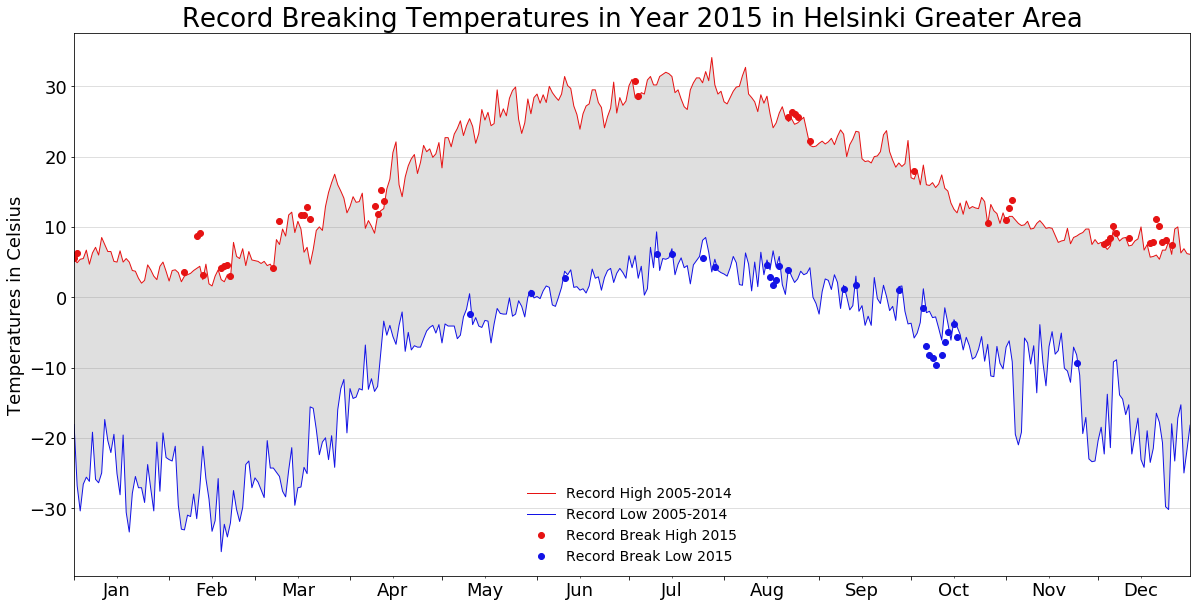

In [148]:
### Plotting

## Creating a line plot of record high and record low temperatures by day of the year 
## over the period 2005-2014
#Setting the default font size
plt.rcParams.update({'font.size': 18})
# Creating a new figure
plt.figure(figsize=(20,10))
# Adding a title
plt.title('Record Breaking Temperatures in Year 2015 in Helsinki Greater Area', fontsize=26)
# Plotting the maximum temperatures
plt.plot(Max_Min_Daily.Date, Max_Min_Daily.Record_High_10y, linewidth = 1, c=(0.9023,0.0742,0.0742))
# Plotting the minimum temperatures
plt.plot(Max_Min_Daily.Date, Max_Min_Daily.Record_Low_10y, linewidth = 1, c=(0.0742,0.0742,0.9023))
## Labelling and formatting the x axis
axses = plt.gca() # Get the current axses
# A major tick starts at the beginning of each month
axses.xaxis.set_major_locator(mdates.MonthLocator())
axses.xaxis.set_major_formatter(mticker.NullFormatter())
# A minor tick goes in the middle of each month displaying also the month in letters
axses.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
axses.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
# Defining the limits of the axis
xaxis_start = Max_Min_Daily['Date'][0]
xaxis_stop = Max_Min_Daily['Date'][364]
axses.set_xlim(xaxis_start, xaxis_stop)
## Labelling and formatting the y axis
axses.set_ylabel('Temperatures in Celsius', fontsize = 18)
# Setting a horizontal grid
axses.yaxis.grid(color='grey', linestyle='-', linewidth=1, alpha=0.25)
## Shading the area between the two curves
plt.fill_between(YearDays, 
                 Max_Min_Daily.Record_High_10y, Max_Min_Daily.Record_Low_10y, 
                 facecolor='grey', 
                 alpha=0.25) # alpha is a transparency value
## Creating a scatter plot of the record breaking high and low temperatures in year 20015
plt.plot(Record_Break_High_2015.Date, Record_Break_High_2015.Record_High_2015, 'o', c=(0.9023,0.0742,0.0742))
plt.plot(Record_Break_Low_2015.Date, Record_Break_Low_2015.Record_Low_2015, 'o', c=(0.0742,0.0742,0.9023))
## Creating a legend
plt.legend(['Record High 2005-2014', 'Record Low 2005-2014', 'Record Break High 2015', 'Record Break Low 2015'], loc = 8, frameon=False, fontsize = 14)
## Showing the plot
plt.show() 

## About Plot's Optimization

* The size of the figure has been set big enough and the shape has been defined in order to maximize visibility of the differences of values over a log period (a year)

* Intuitive colors have been chosen for warm (red) and cold (blue) temperatures while trying not to use too bright colors that could be tiring for the eyes

* Font size has been set to appropriate values separately in the title, in the axes values and labels and in the legend

* The size of the line width of the line graph has been set thin enough to show the variability over time

* In order to improve readability, the ticks in the x axis have been limited to one major tick and one minor tick per month and the values have been limited to the month abbreviation in letters. Those ticks have been positioned to clearly delimit the data related to each month. Also, in order to limit chart junk, no additional label has been added to the x axis. Finally, to use space in optimal way, the x axis space has been limited to what is strictly necessary to show data on the y axis

* A label has been added to the y axis to indicate the common unit of measurement for the temperatures

* Shaded horizontal grids have been added to make reading of the temperatures easy

* An accurate title and a descriptive legend have been added. The legend has been positioned without any frame in a part of the graph which is not busy with plots

<sub>Jupyter Notebook server 5.5.0-6f60dc6</sub>
<br></br>
<sub>Python 3.6.5</sub>